<a href="https://colab.research.google.com/github/Auvarmf/BasicMachineLearning/blob/main/PERTEMUAN4_AuvarMahsaFahlevi_2117051027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pertemuan 4

## Library

In [75]:
import pandas as pd
import numpy as np
import sklearn
import yellowbrick

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

## Dataset

In [76]:
# buat data tabular seperti dibawah ini
df = pd.DataFrame(
    {
        "ID Buah"  : pd.Series([1, 2, 3, 4, 5]),
        "Diameter" : pd.Series([7.0, 7.1, 6.5, 6.6, 6.8]),
        "Berat"    : pd.Series([165, 170, 180, 195, 200]),
    }
)

In [77]:
df

,ID Buah,Diameter,Berat
0,1,7.0,165
1,2,7.1,170
2,3,6.5,180
3,4,6.6,195
4,5,6.8,200


## Algoritma K-Means

In [78]:
# pemilihan feature
df_train = df.drop("ID Buah", axis=1)
df_train

,Diameter,Berat
0,7.0,165
1,7.1,170
2,6.5,180
3,6.6,195
4,6.8,200


In [79]:
# fitting / predict / labeling berdasarkan jumlah kluster (n = 2)
n = 2
kmeans_model = KMeans(n_clusters=n, n_init=1, random_state=100).fit(df_train)

In [80]:
# pelabelan cluster
df["kluster"] = kmeans_model.labels_
df

,ID Buah,Diameter,Berat,kluster
0,1,7.0,165,0
1,2,7.1,170,0
2,3,6.5,180,1
3,4,6.6,195,1
4,5,6.8,200,1


In [81]:
# hasil dari update centroid
print(kmeans_model.cluster_centers_)

[[  7.05       167.5       ]
 [  6.63333333 191.66666667]]


## Tantangan dari algoritma K-Means
Limitasi atau tantangan dari algoritma k-means adalah menentukan nilai centroid diawal dan jumlah kluster yang manual, sehingga perlu ada mekanisme/metode untuk memilih centroid diawal dan jumlah kluster

## Pemilihan centroid awal


*   Menggunakan pengaturan parameter yang ada di sklearn
*   Lebih lengkap bisa dibaca di dokumentasinya https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html



In [82]:
# n_cluster merupakan parameter dari jumlah cluster/kelompok yang harus ditentukan
# nilai n_cluster tergantung data, atau bisa berdasarkan metode elbow, dll, defaultnya 8 atau ketika tidak diisi jumlah cluster = 8
# n_init merupakan parameter untuk menentukan berapa kali algoritma k-means dijalankan dengan centroid seed yang berbeda
# nilai n_init bisa 1 atau lebih dari 1, defaultnya 10/auto
# random_state merupakan parameter untuk menentukan angka acak sebagai inisialisasi centroid
# nilai random_state diisi dengan nilai deterministik (0-100), defaultnya None)

# atur parameter untuk kmeans_model_2 ini sehingga berbeda dengan parameter kmeans_model sebelumnnya
kmeans_model_2 = KMeans(n_clusters=2, n_init="auto").fit(df_train)
df2 = df.copy()
df2["kluster"] = kmeans_model_2.labels_
df2

,ID Buah,Diameter,Berat,kluster
0,1,7.0,165,0
1,2,7.1,170,0
2,3,6.5,180,0
3,4,6.6,195,1
4,5,6.8,200,1


**Lihat hasil labeling cluster berbeda ketika parameter berbeda**

## Pemilihan jumlah kluster


*   Menggunakan metode elbow
*   Library nya bisa apa saja, contoh disini menggunakan library scikit yellowbrick cluster https://www.scikit-yb.org/en/lates/api/cluster/elbow.html



In [83]:
# standarisasi terlebih dahulu dalam bentuk array
x_array = np.array(df_train)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)

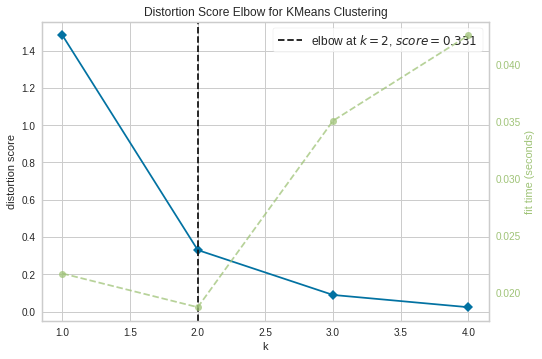

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [84]:
km = KMeans(n_init=1, random_state=100)
visualizer = KElbowVisualizer(km, k=(1, 5), timings=True)
visualizer.fit(x_scaled)
visualizer.show()

**Lihat, Hasil menunjukan k=2, artinya nilai 2 disini bisa dijadikan acuan untuk jumlah kluster**

In [85]:
# parameter n_cluster dibawah ini bisa kita isi dengan nilai dari hasil elbow method, yang mana k=2
# KMeans(n_clusters=k, n_init="auto").fit(df_train)

**Tugas**



* Gunakan data dari url ini https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv
* Hasil bisa berbeda tergantung pengolahan data, pemilihan nilai centroid diawal dan jumlah kluster
* Yang menjadi penilaian adalah proses coding dari mulai pengambilan data, pengolahan data, hingga penerapan algoritma k-means




In [86]:
# pengambilan data dari CSV
url = "https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv"
data = pd.read_csv(url)

# terdapat error ValueError: Input X contains NaN. karena terdapat nilai NaN (Not a Number) pada data yang akan dilakukan klastering. 
# sehingga harus menghapus baris data yang mengandung nilai NaN
data.dropna(inplace=True)

In [87]:
# terjadi error yang disebabkan oleh adanya nilai string "not pass" pada kolom 'pass_test' yang tidak dapat dikonversi ke dalam nilai float.
# sehingga untuk mengatasi error tersebut, harus menghapus baris yang memiliki nilai string pada kolom 'pass_test' atau menggantinya dengan nilai numerik yang sesuai. disini saya mengganti nilai 'not pass' dengan nilai 0
# mengganti nilai 'not pass' dengan 0 dan nilai 'pass' dengan 1
data['pass_test'] = data['pass_test'].replace('not pass', 0)
data['pass_test'] = data['pass_test'].replace('pass', 1)

# mengkonversi kolom 'pass_test' ke tipe float
data['pass_test'] = data['pass_test'].astype(float)

# menentukan jumlah kluster dan centroid awal
n_clusters = 4
init_centroids = [[99, 71.0, 93.0, 52.0, 44.0, 24, 0], [86, 71.0, 84.0, 17.0, 21.0, 41, 0], [93, 85.0, 68.0, 29.0, 44.0, 50, 0], [85, 95.0, 34.0, 73.0, 57.0, 98, 0]]

In [88]:
# membuat objek KMeans dan melakukan klastering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(data[["activeness_score", "assignment_score", "pre_test_score", "post_test_score", "midterm_test_score", "end_semester_test_score", "pass_test"]])

# menambahkan kolom 'cluster' ke data
data['cluster'] = kmeans.predict(data[["activeness_score", "assignment_score", "pre_test_score", "post_test_score", "midterm_test_score", "end_semester_test_score", "pass_test"]]).astype(int)

# tampilkan hasil klastering
output_data = data[["npm", "activeness_score", "assignment_score", "pre_test_score", "post_test_score", "midterm_test_score", "end_semester_test_score", "pass_test", "cluster"]]
df = pd.DataFrame(output_data, columns=["npm", "activeness_score", "assignment_score", "pre_test_score", "post_test_score", "midterm_test_score", "end_semester_test_score", "pass_test", "cluster"])
df

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test,cluster
0,2022041101,99,71.0,93.0,52.0,44.0,24,0.0,2
2,2022041103,86,71.0,84.0,17.0,21.0,41,0.0,2
4,2022041105,93,85.0,68.0,29.0,44.0,50,0.0,2
5,2022041106,85,95.0,34.0,73.0,57.0,98,0.0,1
6,2022041107,95,79.0,52.0,54.0,85.0,13,0.0,2
...,...,...,...,...,...,...,...,...,...
366,2022041467,88,75.0,80.0,11.0,55.0,82,0.0,1
368,2022041469,96,87.0,55.0,56.0,95.0,11,1.0,2
369,2022041470,569,83.0,89.0,15.0,86.0,13,0.0,3
370,2022041471,84,92.0,87.0,97.0,42.0,27,1.0,2
